**Créditos**: baseado nun código visto en: https://medium.com/@a.fernandez.troyano/nube-de-palabras-word-cloud-con-python-a-partir-de-varias-webs-111e94220822

Repo orixinal: https://github.com/bigdatawirtz/nubes/blob/main/nube_de_respostas.ipynb

# Facendo unha nube de palabras

## Instalando dependencias

- conda activate bigdata

- conda install numpy pandas

- conda install -c conda-forge wordcloud nltk

## Cargamos librarías

In [3]:
#Librerías básicas
import numpy as np
import pandas as pd

#Librerías para imaxes, nubes de palabras e plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#Librarías para limpieza de datos
import string
import nltk
from nltk.corpus import stopwords

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daniel.martinezcarre\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


True

**Carga de texto**

In [36]:
archivo = open('defino.txt', 'r')

In [37]:
texto = archivo.read()
texto

'- datos masivos, inteligencia de datos, datos a gran escala es un término que hace referencia a conjuntos de datos tan grandes y complejos que precisan de aplicaciones informáticas no tradicionales de procesamiento de datos para tratarlos adecuadamente.\n- Big data es el almacenamiento, procesamiento, selección y gestión de datos de cualquier tipo a gran escala.\n- Analisis de una gran cantidad de datos para sacar conclusiones.\n- Tratamento e analise de grandes cantidades de datos.\n- La manipulación de una gran cantidad de datos y la consulta de estos con el fin de analizar diferentes situaciones y llegar a conclusiones y predicciones.\n- El Big Data es un conjunto de herramientas que consiste en: Obtener, limpiar y procesar datos de un gran tamaño para después manipular o encontrar correlaciones entre estos datos.\n- Big data es la combinación o un gran conjunto de datos que se puede llegar a almacenar y/o procesar\n- Entendemos por Big Data el análisis, procesado y gestión de un e

**Limpeza do texto**

In [38]:
#Generación de lista de signos de puntuación

punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

punctuation[:10] #Ejemplo de los símbolos de puntuación que están incluidos

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [39]:
#Listado de palabras que queremos eliminar del texto
#Es un proceso iterativo por lo que si después vemos que nos siguen quedado "caractéres raros" simplemente venímos aquí y los agregamos
#Existe librerías y listados de "Stop_words", pero por ahora vamos a dejarlo vacío

#nltk.download('stopwords') #La primera vez debemos descargar las "stopwords"

stop_words = stopwords.words('spanish') #Listado de palabras a eliminar

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser"] #Añadimos algunos caractéres que hemos encontrado

stop_words[:10]


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [40]:
#Reemplazamos signos de puntuación por "":

for sw in stop_words:
    clean_texto = texto.lower().replace(sw,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")

#Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
clean_texto = " ".join(clean_texto.split())    

#Reemplazamos stop_words por "":    
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

clean_texto



'datos masivos inteligencia datos datos gran escala término referencia conjuntos datos tan grandes complejos precisan aplicaciones informáticas tradicionales procesamiento datos tratarlos adecuadamente big data almacenamiento procesamiento selección gestión datos cualquier tipo gran escala analisis gran cantidad datos sacar conclusiones tratamento analise grandes cantidades datos manipulación gran cantidad datos consulta fin analizar diferentes situaciones llegar conclusiones predicciones big data conjunto herramientas consiste obtener limpiar procesar datos gran tamaño después manipular encontrar correlaciones datos big data combinación gran conjunto datos llegar almacenar procesar entendemos big data análisis procesado gestión elevado conjunto datos finalidad específica big data conjunto técnicas permite analizar tramitar sacar conclusiones volúmenes datos gran escala mediante uso operaciones complejas big data conjunto datos tratados software especializado big data principal caracte

In [41]:
lista_texto = clean_texto.split(" ")

palabras = []

#Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

palabras

['datos',
 'masivos',
 'inteligencia',
 'datos',
 'datos',
 'gran',
 'escala',
 'término',
 'referencia',
 'conjuntos',
 'datos',
 'tan',
 'grandes',
 'complejos',
 'precisan',
 'aplicaciones',
 'informáticas',
 'tradicionales',
 'procesamiento',
 'datos',
 'tratarlos',
 'adecuadamente',
 'big',
 'data',
 'almacenamiento',
 'procesamiento',
 'selección',
 'gestión',
 'datos',
 'cualquier',
 'tipo',
 'gran',
 'escala',
 'analisis',
 'gran',
 'cantidad',
 'datos',
 'sacar',
 'conclusiones',
 'tratamento',
 'analise',
 'grandes',
 'cantidades',
 'datos',
 'manipulación',
 'gran',
 'cantidad',
 'datos',
 'consulta',
 'fin',
 'analizar',
 'diferentes',
 'situaciones',
 'llegar',
 'conclusiones',
 'predicciones',
 'big',
 'data',
 'conjunto',
 'herramientas',
 'consiste',
 'obtener',
 'limpiar',
 'procesar',
 'datos',
 'gran',
 'tamaño',
 'después',
 'manipular',
 'encontrar',
 'correlaciones',
 'datos',
 'big',
 'data',
 'combinación',
 'gran',
 'conjunto',
 'datos',
 'llegar',
 'almacenar'

**Contaxe de palabras**

In [42]:
#Generamos un diccionario para contabilizar las palabras:

word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        # Va sumando el número de veces que se repite la palabra
        word_count[palabra][0]+=1
    else:
        # Si aún no se repite, se añade la palabra nueva al diccionario.
        word_count[palabra]=[1]

word_count

{'datos': [18],
 'masivos': [1],
 'inteligencia': [1],
 'gran': [12],
 'escala': [3],
 'término': [2],
 'referencia': [1],
 'conjuntos': [1],
 'tan': [1],
 'grandes': [3],
 'complejos': [1],
 'precisan': [1],
 'aplicaciones': [1],
 'informáticas': [1],
 'tradicionales': [1],
 'procesamiento': [2],
 'tratarlos': [1],
 'adecuadamente': [1],
 'big': [9],
 'data': [9],
 'almacenamiento': [1],
 'selección': [1],
 'gestión': [3],
 'cualquier': [1],
 'tipo': [1],
 'analisis': [1],
 'cantidad': [3],
 'sacar': [4],
 'conclusiones': [5],
 'tratamento': [1],
 'analise': [1],
 'cantidades': [2],
 'manipulación': [1],
 'consulta': [1],
 'fin': [1],
 'analizar': [2],
 'diferentes': [1],
 'situaciones': [1],
 'llegar': [2],
 'predicciones': [1],
 'conjunto': [5],
 'herramientas': [1],
 'consiste': [1],
 'obtener': [1],
 'limpiar': [1],
 'procesar': [2],
 'tamaño': [2],
 'después': [1],
 'manipular': [1],
 'encontrar': [1],
 'correlaciones': [1],
 'combinación': [1],
 'almacenar': [1],
 'entendemos': 

In [43]:
#Generamos el DF y lo ordenamos:

df = pd.DataFrame.from_dict(word_count).transpose() # transpose = CAMBIAR
df
#df.columns=["freq"]
#df.sort_values(["freq"], ascending=False, inplace=True)
#df.head(10)

,0
datos,18
masivos,1
inteligencia,1
gran,12
escala,3
...,...
unhas,1
transmisión,1
formación,1
propósito,1


**Mostrar gráfica de ocorrencias das palabras**

In [46]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

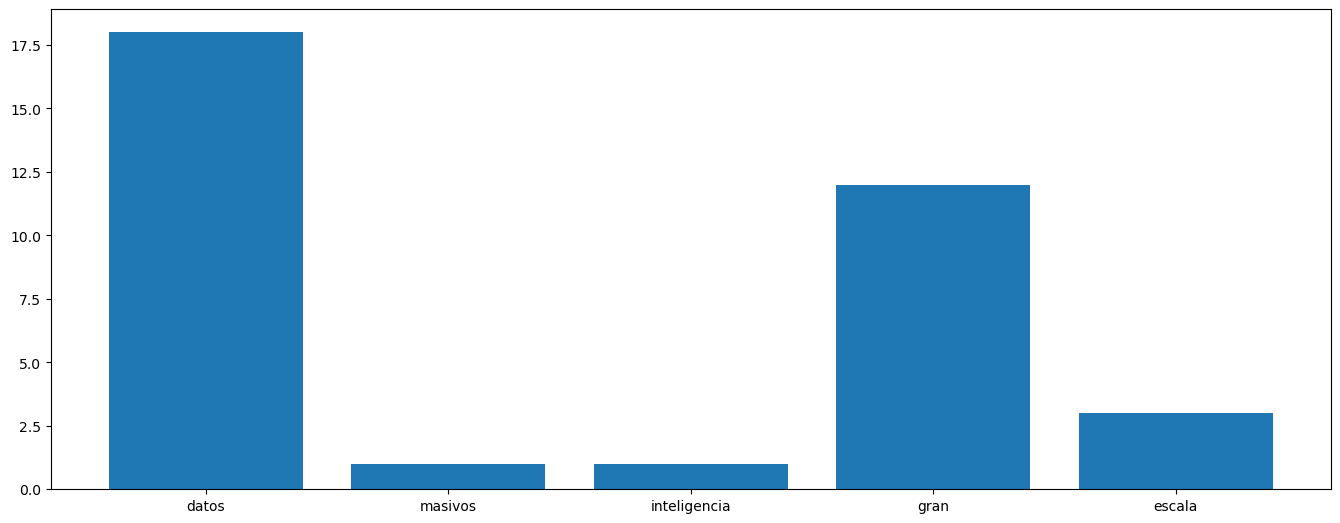

In [47]:
#Graficamos el TOP 5 palabras por frecuencia

plot_bar(data=df, top=5)

**Crear nube de palabras**

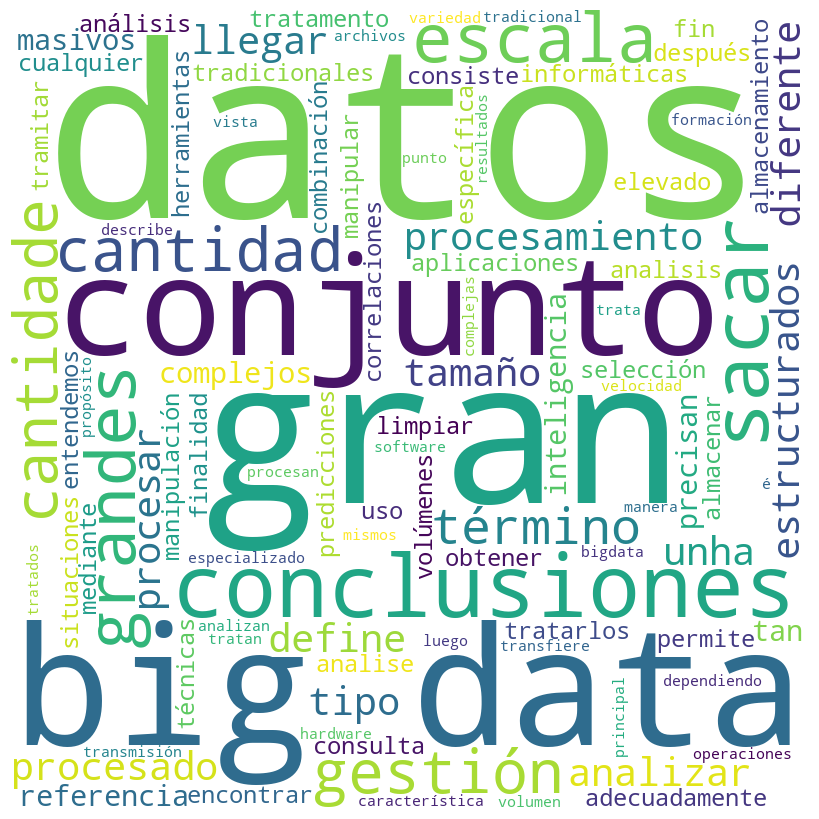

In [48]:
#word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(clean_texto)

#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada
word_cloud.to_file("./img/nube_bigdata.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()